In [1]:
import pandas as pd

# dados importados de um diretorio do kaglle <https://www.kaggle.com/datasets/gopalmahadevan/fraud-detection-example?resource=download>
fraud_dataset = pd.read_csv("fraud_dataset_example.csv")

C:\Users\02190314283\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


# Renomendo o dataset

In [2]:

fraud_dataset = fraud_dataset[['isFraud','isFlaggedFraud','step',
                               'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
                               'nameDest', 'oldbalanceDest', 'newbalanceDest', ]]

colunas = {
    'isFraud': 'fraude',
    'isFlaggedFraud':'super_fraude',
    'step':'tempo',
    'type':'tipo',
    'amount':'valor',
    'nameOrig':'cliente1',
    'oldbalanceOrg':'saldo_inicial_c1',
    'newbalanceOrig':'novo_saldo_c1',
    'nameDest':'cliente2',
    'oldbalanceDest':'saldo_inicial_c2',
    'newbalanceDest':'novo_saldo_c2',
}

fraud_dataset = fraud_dataset.rename(columns= colunas)

In [3]:
# Descrição dos dados
print(fraud_dataset['fraude'].value_counts())
print(fraud_dataset.info())
print(fraud_dataset.describe())

0    101497
1       116
Name: fraude, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101613 entries, 0 to 101612
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   fraude            101613 non-null  int64  
 1   super_fraude      101613 non-null  int64  
 2   tempo             101613 non-null  int64  
 3   tipo              101613 non-null  object 
 4   valor             101613 non-null  float64
 5   cliente1          101613 non-null  object 
 6   saldo_inicial_c1  101613 non-null  float64
 7   novo_saldo_c1     101613 non-null  float64
 8   cliente2          101613 non-null  object 
 9   saldo_inicial_c2  101613 non-null  float64
 10  novo_saldo_c2     101613 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 8.5+ MB
None
              fraude  super_fraude          tempo         valor  \
count  101613.000000      101613.0  101613.000000  1.016130e+05   
mean        0

Lendo os dados a partir do pandas profillig 


In [5]:
# import pandas_profiling

# pandas_profiling.ProfileReport(fraud_dataset, title="Pandas Profiling Report", vars={"num": {"low_categorical_threshold": 0}})

Formatando os dados 

In [6]:
fraud_dataset = pd.get_dummies(data = fraud_dataset , columns= ["tipo"])
fraud_dataset = fraud_dataset.drop(['cliente1',"cliente2","super_fraude"], axis = 1)
fraud_dataset

,fraude,tempo,valor,saldo_inicial_c1,novo_saldo_c1,saldo_inicial_c2,novo_saldo_c2,tipo_CASH_IN,tipo_CASH_OUT,tipo_DEBIT,tipo_PAYMENT,tipo_TRANSFER
0,0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,1,0
1,0,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,1,0
2,1,1,181.00,181.00,0.00,0.00,0.00,0,0,0,0,1
3,1,1,181.00,181.00,0.00,21182.00,0.00,0,1,0,0,0
4,0,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
101608,0,10,7477.02,785.00,0.00,0.00,0.00,0,0,0,1,0
101609,0,10,282252.35,220339.29,0.00,95156.01,91286.97,0,1,0,0,0
101610,0,10,17289.01,0.00,0.00,0.00,0.00,0,0,0,1,0
101611,0,10,1347146.45,1605.00,0.00,541639.43,2186953.43,0,0,0,0,1


In [7]:
y = fraud_dataset["fraude"] # escolhendo a coluna target
x = fraud_dataset.drop("fraude", axis = 1) # separando os dados

Aplicando algoritmo de Regressão logística no dataset

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import  metrics

def regressao(target , dados ):
    SEED = 42
    x_train ,x_test,y_train ,y_test = train_test_split(target,dados, test_size= 0.25 , random_state= SEED)

    lr = LogisticRegression(max_iter= 1000 , random_state= SEED)
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)

#  Visualizando métricas de eficiência sobre a regressão logística

    print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
    print("Precisão:",metrics.precision_score(y_test, y_pred))
    print("Recall:",metrics.recall_score(y_test, y_pred)) 
    print("F1:",metrics.f1_score(y_test, y_pred))
    
regressao(x,y)

C:\Users\02190314283\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
C:\Users\02190314283\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecat

Acurácia: 0.9990159030074004
Precisão: 0.25
Recall: 0.043478260869565216
F1: 0.07407407407407408


C:\Users\02190314283\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


Usando matriz de confusão para visualizar a eficiência da regressão logística sobre o dataset

In [10]:
import matplotlib.pyplot as plt 
# importando bibliotecas para a  funçao matrix de confusao
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline


ImportError: cannot import name 'ConfusionMatrixDisplay' from 'sklearn.metrics' (C:\Users\02190314283\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

In [ ]:

cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix= cm)
disp.plot()

Aplicando  a técnica ROC onde ela categorizar uma variável numérica X em relação a uma variável categórica Y sobre o dataset.

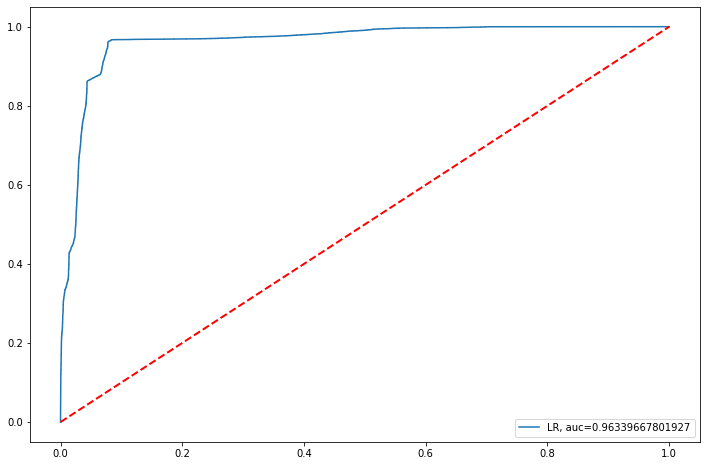

In [174]:

y_pred_proba = lr.predict_proba(x_test)[::, 1]
fpr, tpr, _= metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
# plotando o grafico ROC
plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr,tpr,label="LR, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)


Aplicando Overfitting para parametrizar o dataframe.
Overfitting é um termo usado em estatística para descrever quando um modelo estatístico se 
ajusta muito bem ao conjunto de dados anteriormente observado, mas se mostra ineficaz para prever novos resultados.
É comum que a amostra apresente desvios causados por erros de medição ou fatores aleatórios.

In [155]:
# importando bibliotecas para aplicar o Overfitting
# pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
smote = SMOTE(random_state= 42) 


Aplicando Overfitting sobre os dados 

In [156]:
x_resampled, y_resampled = smote.fit_resample(x,y)
df_balanced = pd.concat([y_resampled, x_resampled], axis=1)
df_balanced['fraude'].value_counts()


0    101497
1    101497
Name: fraude, dtype: int64

Aplicando a Regressão logística sobre os dados balanceados

In [162]:
x = df_balanced.iloc[:, 1:].values
y = df_balanced.iloc[:, 0].values

def regressao_overfitting(target , dados ):
    SEED = 42
    x_train ,x_test,y_train ,y_test = train_test_split(target,dados, test_size= 0.25 , random_state= SEED)

    lr = LogisticRegression(max_iter= 1000 , random_state= SEED)
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)

# visualizando metricas de eficiencia sobre a regreçao logistica

    print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
    print("Precisão:",metrics.precision_score(y_test, y_pred))
    print("Recall:",metrics.recall_score(y_test, y_pred)) 
    print("F1:",metrics.f1_score(y_test, y_pred))
    
regressao_overfitting(x,y)

Acurácia: 0.9417722516699837
Precisão: 0.9241993556945234
Recall: 0.9623125493291239
F1: 0.9428709521507975


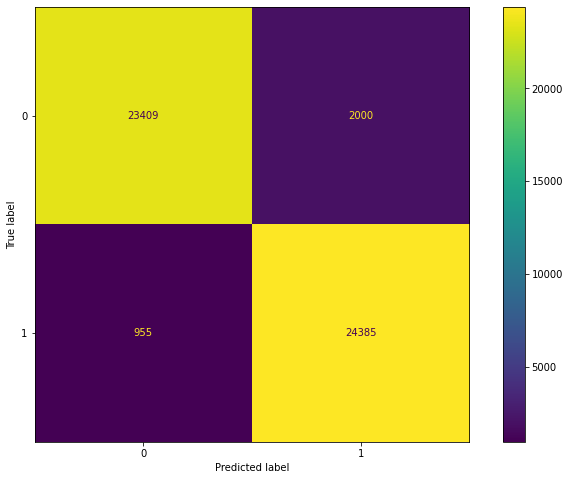

In [163]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix= cm)
disp.plot()

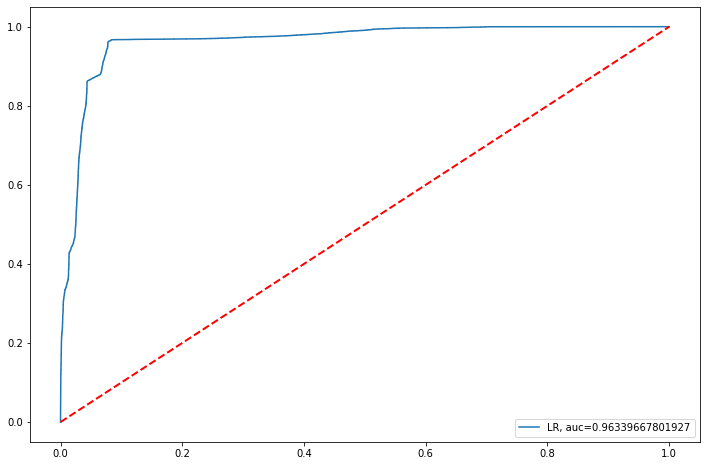

In [159]:
y_pred_proba = lr.predict_proba(x_test)[::, 1]
fpr, tpr, _= metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr,tpr,label="LR, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

Arvore de Decisão sobre os dados balanceados

In [164]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth= 5,  random_state= SEED)
model = dt.fit(x_train, y_train)
y_pred =dt.predict(x_test)

print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
print("Precisão:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred)) 
print("F1:",metrics.f1_score(y_test, y_pred))

Acurácia: 0.9622849711324362
Precisão: 0.9381639982043992
Recall: 0.9897000789265983
F1: 0.9632432017206943


Matriz de confusão sobre a arvore de decisão

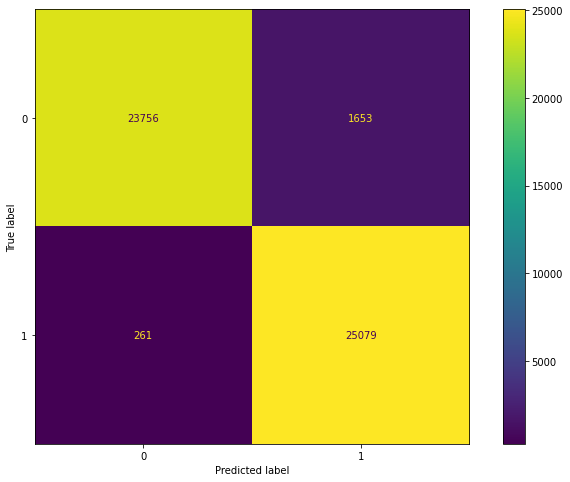

In [165]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix= cm)
disp.plot()

Matriz de confusão sobre a técnica ROC

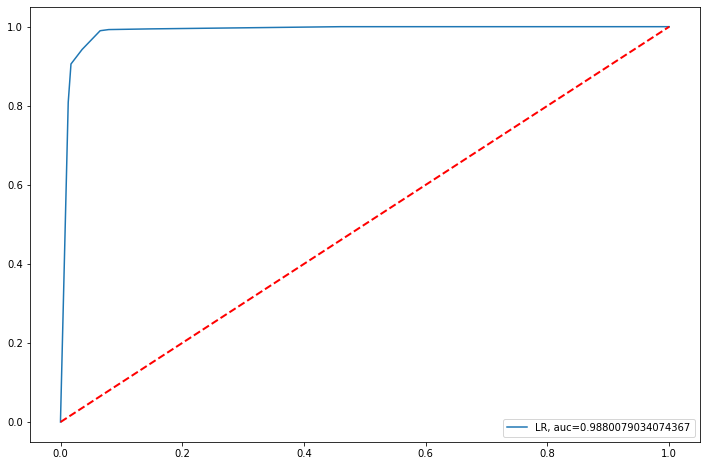

In [167]:
y_pred_proba = dt.predict_proba(x_test)[::, 1]
fpr, tpr, _= metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr,tpr,label="LR, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

Random Forest sobre os dados

In [115]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth= 5,  random_state= SEED)
model = rf.fit(x_train, y_train)
y_pred =rf.predict(x_test)
print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
print("Precisão:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred)) 
print("F1:",metrics.f1_score(y_test, y_pred))


Acurácia: 0.9723738398786183
Precisão: 0.9705165500432424
Recall: 0.9742699289660616
F1: 0.9723896175509079


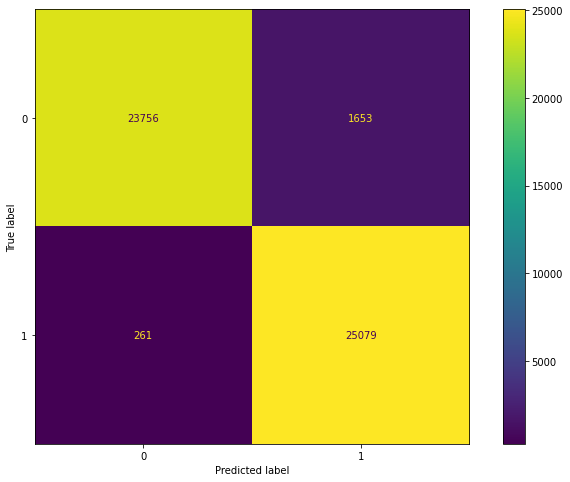

In [169]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix= cm)
disp.plot()

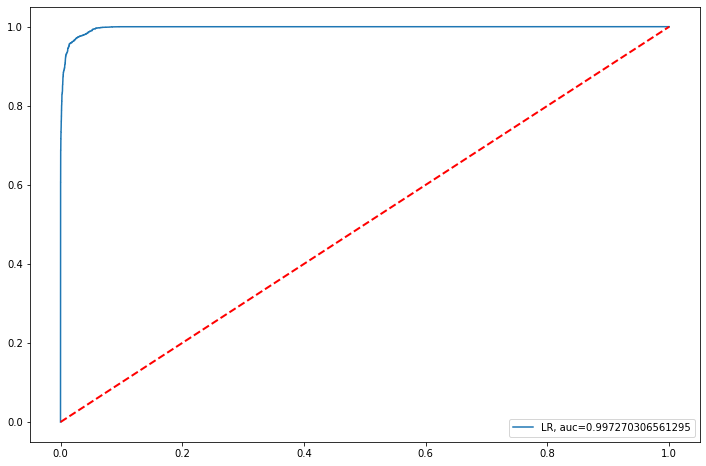

In [170]:
y_pred_proba = rf.predict_proba(x_test)[::, 1]
fpr, tpr, _= metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr,tpr,label="LR, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

# Classificadores
Comparando as metricas

In [171]:
# Armazenando os classificadores
classifiers = [
    LogisticRegression(max_iter=1000, random_state=SEED),
    DecisionTreeClassifier(max_depth = 5, random_state=SEED),
    RandomForestClassifier(max_depth= 5, random_state = SEED)]


LogisticRegression
****resultados****
Acurácia: 0.9417722516699837
Precisão: 0.9241993556945234
Recall: 0.9623125493291239
F1: 0.9428709521507975
DecisionTreeClassifier
****resultados****
Acurácia: 0.9622849711324362
Precisão: 0.9381639982043992
Recall: 0.9897000789265983
F1: 0.9632432017206943
RandomForestClassifier
****resultados****
Acurácia: 0.9723738398786183
Precisão: 0.9705165500432424
Recall: 0.9742699289660616
F1: 0.9723896175509079


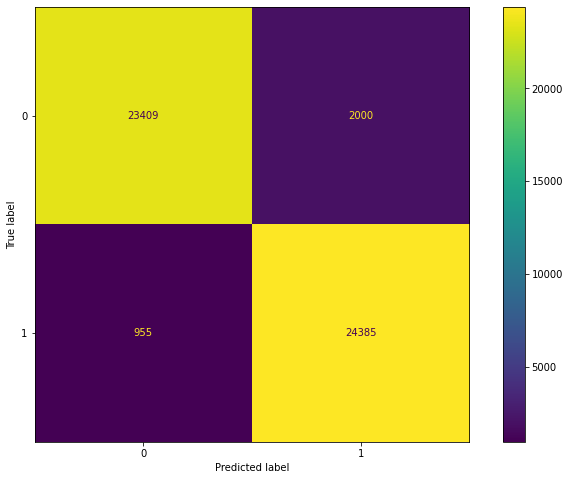

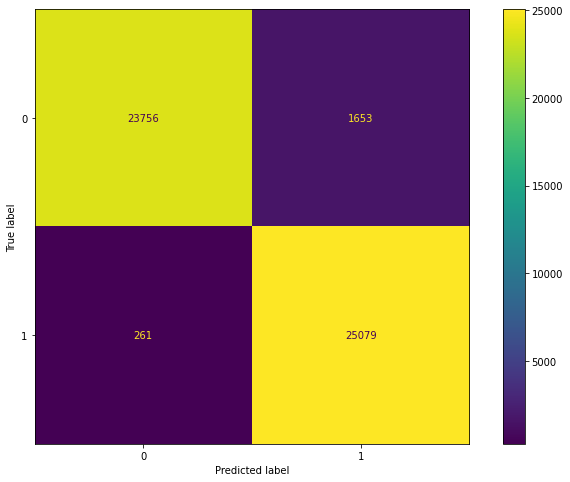

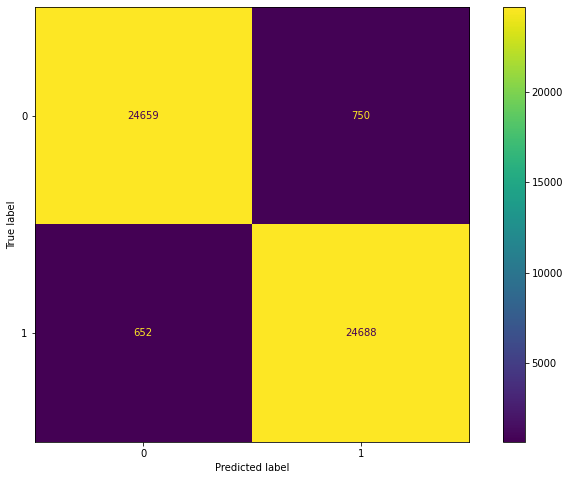

In [172]:
# Laço for para comparar todos os indicadires com matrix de confusao
for clf in classifiers:
    clf.fit(x_train,y_train)
    name = clf.__class__.__name__
    print("="*30)
    print(name)
    print("****resultados****")
    y_pred = clf.predict(x_test)
    print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
    print("Precisão:",metrics.precision_score(y_test, y_pred))
    print("Recall:",metrics.recall_score(y_test, y_pred)) 
    print("F1:",metrics.f1_score(y_test, y_pred))
    cm = confusion_matrix(y_test,y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix= cm)
    disp.plot()
    

# Melhorando RandomForest
Atualização dos parâmetros do Random Florest para melhorar a eficiência dele sobre o dataset

In [123]:
import numpy as np
#renomeando
n_estimators = np.arange(20, 200, step=20)
criterion = ["gini", "entropy"]
max_features = ["auto", "sqrt", "log2"]
max_depth = list(np.arange(2, 10, step=1))
min_samples_split = np.arange(2, 10, step=2)
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

param_grid = {
    "n_estimators": n_estimators,
    "criterion": criterion,
    "max_features": max_features,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "bootstrap": bootstrap,
}


In [126]:
from sklearn.model_selection import RandomizedSearchCV
SEED = 70
rforest = RandomForestClassifier(random_state=SEED)


In [127]:
random_cv = RandomizedSearchCV(
    rforest, param_grid, n_iter=5, cv=3, scoring="recall", n_jobs=-1, random_state = SEED
)


In [128]:
random_cv

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=70),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': array([2, 4, 6, 8]),
                                        'n_estimators': array([ 20,  40,  60,  80, 100, 120, 140, 160, 180])},
                   random_state=70, scoring='recall')

In [129]:
%%time
rcv = random_cv.fit(x, y)

CPU times: total: 24 s
Wall time: 1min 27s


In [131]:
pd.DataFrame(rcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,42.673850,2.339311,1.363785,0.031148,120,4,2,auto,9,gini,False,"{'n_estimators': 120, 'min_samples_split': 4, ...",0.991665,0.999438,0.992817,0.994640,0.003425,2
1,14.226315,0.153850,1.020390,0.069477,120,4,2,auto,2,gini,False,"{'n_estimators': 120, 'min_samples_split': 4, ...",0.914223,0.936009,0.862704,0.904312,0.030736,5
2,15.676266,0.357895,0.411708,0.043981,40,8,1,sqrt,7,entropy,False,"{'n_estimators': 40, 'min_samples_split': 8, '...",0.980285,1.000000,0.973812,0.984699,0.011138,3
3,33.554086,2.192689,1.106070,0.140240,100,8,4,log2,9,entropy,True,"{'n_estimators': 100, 'min_samples_split': 8, ...",0.993497,0.999025,0.992226,0.994916,0.002951,1
4,20.063816,1.752866,1.085072,0.333559,160,6,2,log2,2,gini,False,"{'n_estimators': 160, 'min_samples_split': 6, ...",0.914223,0.943487,0.876537,0.911416,0.027404,4


In [132]:
rcv.best_params_

{'n_estimators': 100,
 'min_samples_split': 8,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 9,
 'criterion': 'entropy',
 'bootstrap': True}

In [133]:
rfn = RandomForestClassifier(**rcv.best_params_, random_state = SEED)

model = rfn.fit(x_train, y_train)
y_pred = rfn.predict(x_test)


In [139]:
print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
print("Precisão:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred)) 
print("F1:",metrics.f1_score(y_test, y_pred))


Acurácia: 0.9915860411042582
Precisão: 0.9906258615936036
Recall: 0.9925414364640884
F1: 0.9915827238857459


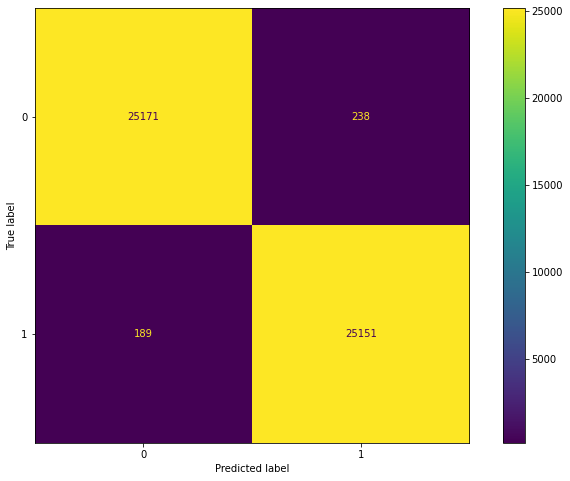

In [140]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix= cm)
disp.plot()

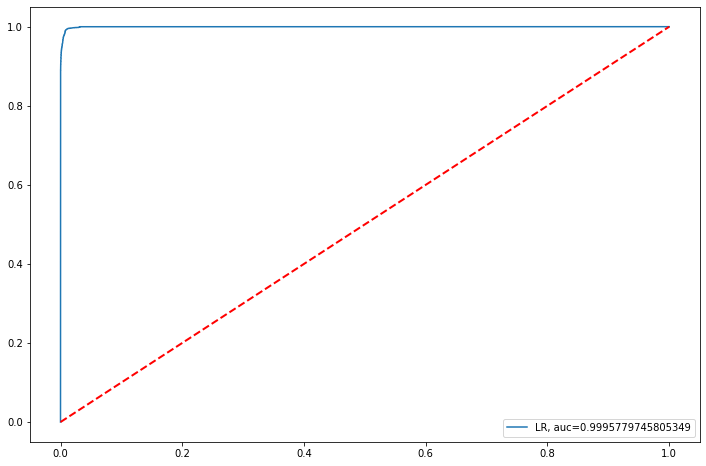

In [141]:
y_pred_proba = rfn.predict_proba(x_test)[::, 1]
fpr, tpr, _= metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr,tpr,label="LR, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)